In [ ]:
#  크롬드라이브 다운로드 : https://chromedriver.chromium.org/downloads
from selenium import webdriver  # pip install selenium
import bs4 # pip install bs4
import time
import urllib.request as REQ  #서버 요청

url = "https://shoppinghow.kakao.com/top"

# 옵션설정
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu")   
options.add_argument("lang=ko_KR")  
# options.add_argument("headless")  # 크롬창이 표시되지 않음
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36')  # user-agent 

# 드라이브 로딩
driver = webdriver.Chrome(executable_path="driver/chromedriver.exe", options=options)

# 페이지 접속
driver.get(url)

# 로딩되는 시간이 있으므로 1초 기다림
time.sleep(1)

# //*[@id="topRecomKeywordWrap"]/div[2]/ul/li[  1  ]/a/img
# //*[@id="topRecomKeywordWrap"]/div[2]/ul/li[  2  ]/a/img
# //*[@id="topRecomKeywordWrap"]/div[2]/ul/li[  3  ]/a/img

data4 = []
for i in range(1, 4, 1):
    img = driver.find_element_by_xpath( f'//*[@id="topRecomKeywordWrap"]/div[2]/ul/li[{i}]/a/img'  )
    print( img.get_attribute("src") )
    data4.append( img.get_attribute("src") )

    # 파일로 저장하기  (src주소, 저장할 폴더및파일명확장자)
    # REQ.urlretrieve( img.get_attribute("src"), f'download/abc_{i}.jpg')
driver.close()

In [ ]:
# 이미지 링크를 이용하여 byte로 받기
import requests
import io
import bson
import time

data5= [] # mongodb에 추가하기 위한 [{},{},{},{}] 형태 로 저장하기 위한 변수
for idx,tmp in enumerate(data4):
    response = requests.get(tmp) # src 주소를 호출해서 값을 받아옴
    byte1 = io.BytesIO(response.content) # 받아온 값을 bytes로 변경함.
    data5.append({"name":"이미지저장","binary_data":bson.Binary(byte1.read())})
    print(idx,tmp)

In [ ]:
import pymongo
import pandas as pd

try:
    username = "id117"
    password = "pw117"
    host = "1.234.5.158"
    port = 37017
    dbname = "id117"

    # conn = pymongo.MongoClient(f"mongodb://{host}:{port}") 
    conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')

    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("image01") #collection == table과 비슷함
    collection.insert_many(data5)

except Exception as e:
    print(e)
finally:
    conn.close() 

In [ ]:
import pymongo
import pandas as pd

try:
    username = "id117"
    password = "pw117"
    host = "1.234.5.158"
    port = 37017
    dbname = "id117"

    # conn = pymongo.MongoClient(f"mongodb://{host}:{port}") 
    conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')

    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("image01") #collection == table과 비슷함

    data6 = collection.find({},{'_id':0})
#     df = pd.DataFrame(data)
#     for tmp in data:
#         print(tmp)
    
except Exception as e:
    print(e)
finally:
    conn.close()

In [ ]:
# 가져온 이미지 출력하기
from PIL import Image
import io

data6 = collection.find({},{'_id':0})

# 가져온 데이터 이미지로 출력하기
img1 = data6[0]['binary_data']

output = Image.open(io.BytesIO(img1)) #bytes를 _io.bytes 타입으로 변환
output

In [ ]:
# 가져온 이미지 출력하기
from PIL import Image
import io

data6 = collection.find({},{'_id':0})

# 가져온 데이터 이미지로 세로로 출력하기
for tmp in data6:
    plt.figure()
    plt.axis('off')
    plt.imshow(Image.open(io.BytesIO(tmp['binary_data'])))
plt.show()

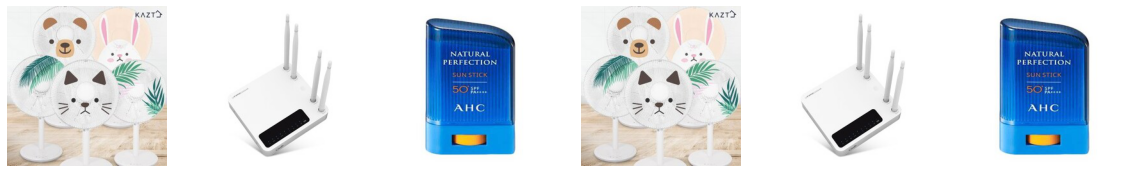

In [40]:
# 가져온 이미지 출력하기
from PIL import Image
import io

data6 = collection.find({},{'_id':0})

# 크기
plt.rcParams['figure.figsize'] = [20,5] # 튜플()

# 가져온 데이터 이미지로 가로로 출력하기
for idx,tmp in enumerate(data6):
    plt.subplot(1,6,idx+1) 
    plt.axis('off')
    plt.imshow(Image.open(io.BytesIO(tmp['binary_data'])))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [10.6,11.6,9.8]

plt.plot(x,y)
plt.show()

In [44]:
#-------------------------------------------
# window mongodb에 데이터 저장
import pymongo
import pandas as pd

try:
#     username = "id117"
#     password = "pw117"
    host = "localhost"
    port = 27017
#     dbname = "id117"

    conn = pymongo.MongoClient(f"mongodb://{host}:{port}") # 암호없이 접속하기 
#     conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')

    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("exam02") #collection == table과 비슷함
    
    data = {"id":"fff","name":"가나다","age":52}
    collection.insert_one(data)
    
except Exception as e:
    print(e)
finally:
    conn.close() 